## 电影数据的缺失值处理

In [171]:
import pandas as pd
import numpy as np

In [172]:
# 准备电影数据
data = pd.read_csv("./IMDB/IMDB-Movie-Data.csv")

In [173]:
# 判断是否存在缺失值 isnull
np.any(pd.isnull(data))

True

In [174]:
# 判断是否存在 notnull
np.all(pd.notnull(data))

False

In [175]:
# 判断存在 缺失值nan
# 删除
data1 = data.dropna()

In [176]:
#验证不存在缺失值
np.any(pd.isnull(data1))

False

In [177]:
# 替换
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [178]:
# 寻找那一列存在缺失值
for col in data.columns:
    if np.any(pd.isnull(data[col])):
        print(col)

Revenue (Millions)
Metascore


In [179]:
# 填补缺失值
data["Revenue (Millions)"].fillna(data["Revenue (Millions)"].mean(), inplace=True)

In [180]:
data['Metascore'].fillna(data['Metascore'].mean(), inplace=True)

In [181]:
np.any(pd.isnull(data))

False

In [182]:
# 不是缺失值nan 有默认标记
# 准备好数据路径和字段名
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [183]:
data = pd.read_csv(path, names=names)

In [184]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [185]:
# ? ----> nan   是numpy中np.nan类型
# 把?替换成np.nan
data_new = data.replace(to_replace="?", value=np.nan)

In [186]:
data_new.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [187]:
# 删除缺失值
data_new.dropna(inplace = True)

In [188]:
np.any(pd.isnull(data_new))

False

In [189]:
type(np.nan)

float

## 数据离散化

In [190]:
## 方法一 自动分组
data = pd.read_csv("./stock_day/stock_day.csv")

In [191]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [192]:
p_change=data['p_change']

In [193]:
p_change.head()

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64

In [194]:
# 分组和统计
qcut = pd.qcut(p_change,10)

In [195]:
qcut_count = qcut.value_counts()

In [196]:
pd.get_dummies(qcut, prefix="q_change").T

,2018-02-27,2018-02-26,2018-02-23,2018-02-22,2018-02-14,2018-02-13,2018-02-12,2018-02-09,2018-02-08,2018-02-07,...,2015-03-13,2015-03-12,2015-03-11,2015-03-10,2015-03-09,2015-03-06,2015-03-05,2015-03-04,2015-03-03,2015-03-02
"q_change_(-10.030999999999999, -4.836]",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"q_change_(-4.836, -2.444]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"q_change_(-2.444, -1.352]",0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
"q_change_(-1.352, -0.462]",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
"q_change_(-0.462, 0.26]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"q_change_(0.26, 0.94]",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"q_change_(0.94, 1.738]",0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
"q_change_(1.738, 2.938]",1,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
"q_change_(2.938, 5.27]",0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"q_change_(5.27, 10.03]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [197]:
## 方法二 自定义分组
cut = pd.cut(p_change, [-100, -7, -5, -3, 0, 3, 5, 7, 100])

In [198]:
cut_count = cut.value_counts()

In [199]:
dummies = pd.get_dummies(cut, prefix="change")

## 数据合并

In [200]:
# pd.concat合并
pd.concat([data, dummies], axis=1)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"change_(-100, -7]","change_(-7, -5]","change_(-5, -3]","change_(-3, 0]","change_(0, 3]","change_(3, 5]","change_(5, 7]","change_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,0,0,0,0,1,0,0,0
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,...,65161.68,0.77,0,0,0,0,1,0,0,0
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,...,68686.33,0.81,0,0,0,0,0,1,0,0
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,...,70552.47,1.36,0,1,0,0,0,0,0,0
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,...,73852.45,0.68,0,0,0,0,1,0,0,0
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,...,74925.33,1.35,0,0,0,1,0,0,0,0


In [201]:
# pd.merge合并

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [202]:
pd.merge(left, right, on=["key1", "key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [203]:
pd.merge(left, right, how="left", on=["key1", "key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN


In [204]:
pd.merge(left, right, how="right", on=["key1", "key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K2,K0,C3,D3


In [205]:
pd.merge(left, right, how="outer", on=["key1", "key2"])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


## 交叉表

In [220]:
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,weekday,posi-nega
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77,1,1
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81,0,0
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36,4,1
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68,3,1
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35,2,1


In [221]:
# 1 数据准备    !不是很懂!!!!
# 求出每一个样本是星期几
date = pd.to_datetime(data.index)

In [222]:
data["weekday"] = date.weekday

In [225]:
data["posi-nega"] = np.where(data["p_change"]> 0, 1, 0)

In [228]:
# 交叉表
new_data = pd.crosstab(data["weekday"], data["posi-nega"])

In [229]:
new_data.head()

posi-nega,0,1
weekday,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [234]:
# 求占比  
percent = new_data.div(new_data.sum(axis=1).astype(np.float32), axis=0)

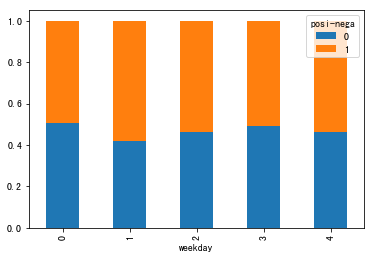

In [236]:
# 画图
percent.plot(kind="bar", stacked=True)

In [237]:
# 使用pivot_table 透视表实现
data.pivot_table(["posi-nega"], index=["weekday"])

,posi-nega
weekday,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


## 分组与聚合

In [239]:
# 案例:不同颜色的不同笔的价格数据
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})

In [240]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [246]:
# DataFrame分组
# 都是返回Series,如果要返回DataFrame,则加上 as_index
col.groupby(by="color", as_index=False)["price1"].max()

,color,price1
0,green,2.75
1,red,4.20
2,white,5.56


In [245]:
# Series进行分组
col["price1"].groupby(col["color"]).max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

## 星巴克零售店铺数据案例

In [247]:
# 1.准备数据
data = pd.read_csv("directory.csv")

In [248]:
data.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


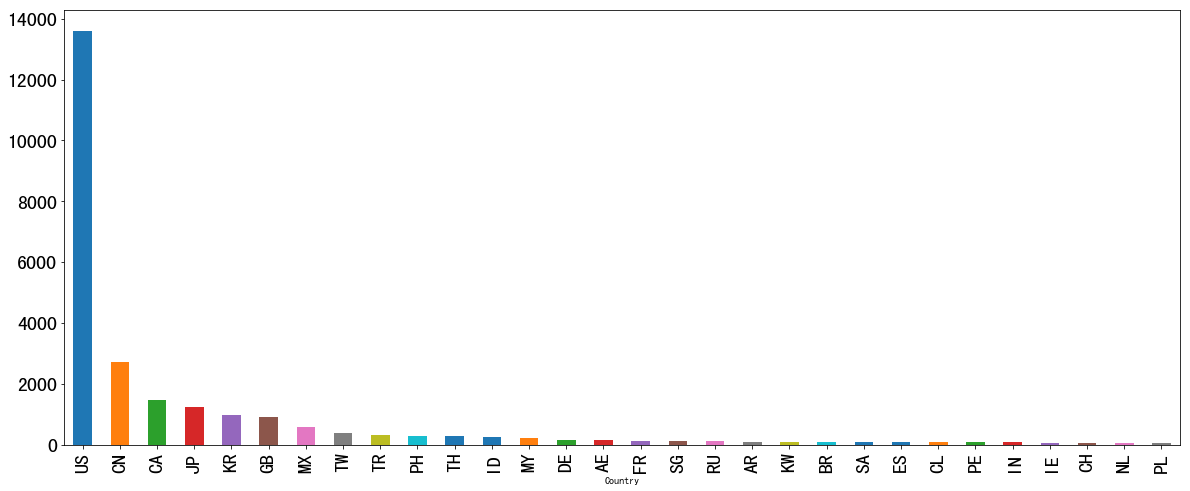

In [260]:
# 按照国家分组，求出每个国家的星巴克零售店数量
data.groupby(by="Country").count()["Brand"].sort_values(ascending=False)[:30].plot(kind="bar", figsize=(20,8), fontsize=20)

In [261]:
# 按国家 省份分
data.groupby(by=["Country", "State/Province"]).count()["Brand"]

Country  State/Province
AD       7                    1
AE       AJ                   2
         AZ                  48
         DU                  82
         FU                   2
         RK                   3
         SH                   6
         UQ                   1
AR       B                   21
         C                   73
         M                    5
         S                    3
         X                    6
AT       3                    1
         5                    3
         9                   14
AU       NSW                  9
         QLD                  8
         VIC                  5
AW       AW                   3
AZ       BA                   3
         SAB                  1
BE       BE                   4
         VAN                  1
         VBR                  2
         VLG                 10
         WAL                  2
BG       2                    1
         23                   4
BH       13                  16
                